In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

В качестве рассматриваемого датасета были выбраны данные об игроках из FIFA 2019.
<h2>Цели</h2>
<ul>
<li>Выявить зависимость между общей оценкой игрока и его зарплатой</li>
<li>Установить, какие навыки больше всего влияют на оценку</li>
</ul>

In [45]:
data = pd.read_csv("FIFA_Processed_Data.csv")
data.head()

,Unnamed: 0.1,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


<h2>Обработка данных</h2>
<ul>
<li>Выбираем только интересующие нас параметры из всех</li>
<li>Исключаем нулевые значения из датасета</li>
</ul>

In [46]:
data = data[["Name", "Nationality", "Overall", "Wage", "Dribbling", "ShotPower", "Reactions", "Positioning", "Aggression"]]
data.head()

,Name,Nationality,Overall,Wage,Dribbling,ShotPower,Reactions,Positioning,Aggression
0,L. Messi,Argentina,94,565000,97.0,85.0,95.0,94.0,48.0
1,Cristiano Ronaldo,Portugal,94,405000,88.0,95.0,96.0,95.0,63.0
2,Neymar Jr,Brazil,92,290000,96.0,80.0,94.0,89.0,56.0
3,De Gea,Spain,91,260000,18.0,31.0,90.0,12.0,38.0
4,K. De Bruyne,Belgium,91,355000,86.0,91.0,91.0,87.0,76.0


In [47]:
for col in data.columns:
    data.drop(data[data[col] == 0].index, inplace=True)
data.describe()

,Overall,Wage,Dribbling,ShotPower,Reactions,Positioning,Aggression
count,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000
mean,66.236801,9883.748186,55.411207,55.490512,61.820516,49.995758,55.879060
std,6.929243,22142.768987,18.904436,17.215926,9.024412,19.521104,17.354347
min,46.000000,1000.000000,4.000000,2.000000,21.000000,2.000000,11.000000
25%,62.000000,1000.000000,49.000000,45.000000,56.000000,39.000000,44.000000
50%,66.000000,3000.000000,61.000000,59.000000,62.000000,55.000000,59.000000
75%,71.000000,9000.000000,68.000000,68.000000,68.000000,64.000000,69.000000
max,94.000000,565000.000000,97.000000,95.000000,96.000000,95.000000,95.000000


<h2>Корреляция</h2>
Можно сделать несколько выводов из матрицы корреляции:
<ul>
<li>Игроки, умеющие хорошо выбирать позицию, также хороши в дриблинге и имеют сильный удар</li>
<li>Рейтинг игрока коррелирует с его показателем реакции</li>
<li>Сильная линейная зависимость между оценкой и зарплатой отсутствует</li>
</ul>

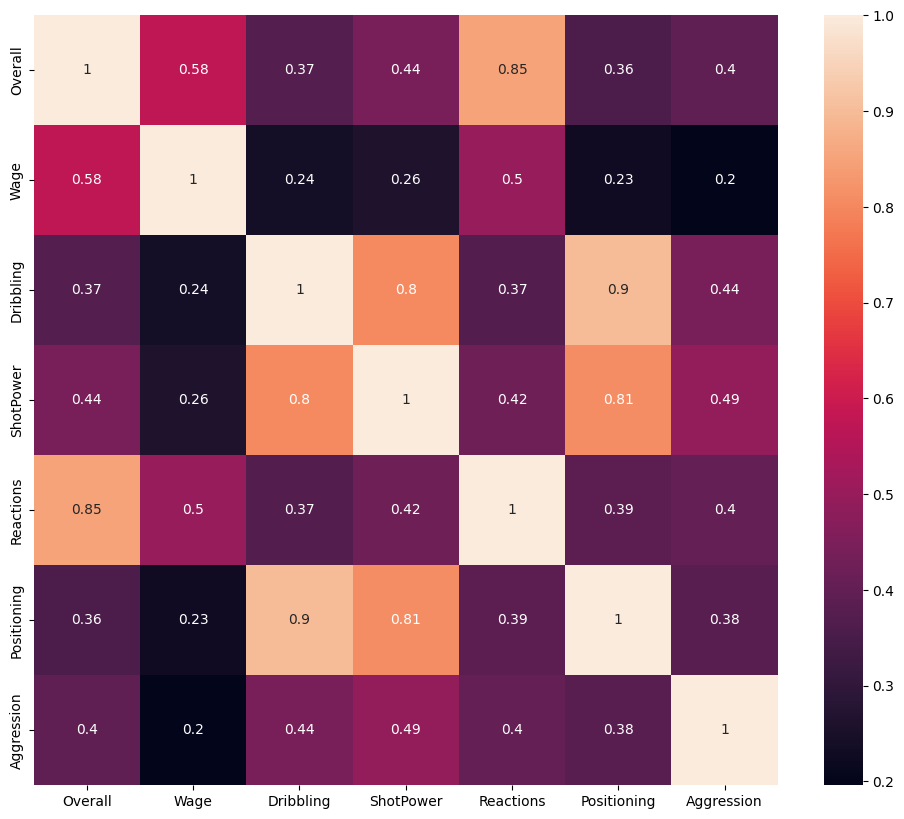

In [48]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(numeric_only=True), annot=True)
None

<h2>Проверка на нормальное распределение</h2>

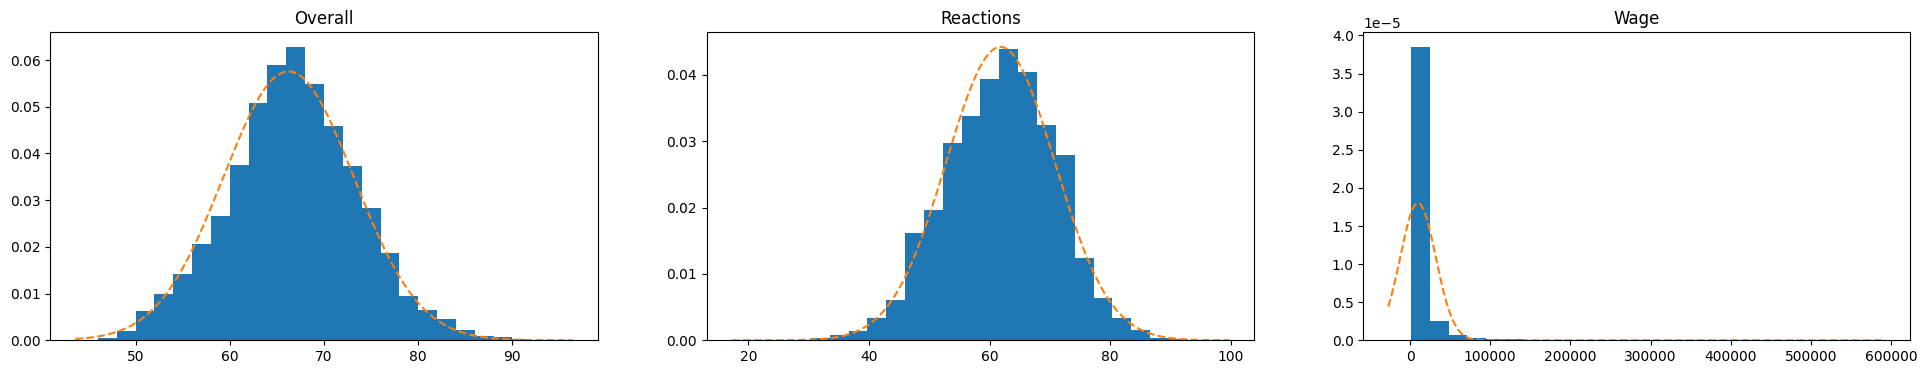

In [49]:
keys = ["Overall", "Reactions", "Wage"]

fig, axes = plt.subplots(1, 3)
fig.set_size_inches(6 * 4, 4)

for key, ax in zip(keys, [ax for ax in axes.flatten()]):
    ax.hist(data[key], density=True, bins=24)
    
    loc = data[key].mean()
    scale = data[key].std()
    
    x_left, x_right = ax.get_xlim()
    x = np.linspace(x_left, x_right, 10000)
    y = stats.norm.pdf(x, loc=loc, scale=scale)
    
    ax.plot(x, y, linestyle='dashed')
    ax.set_title(key)

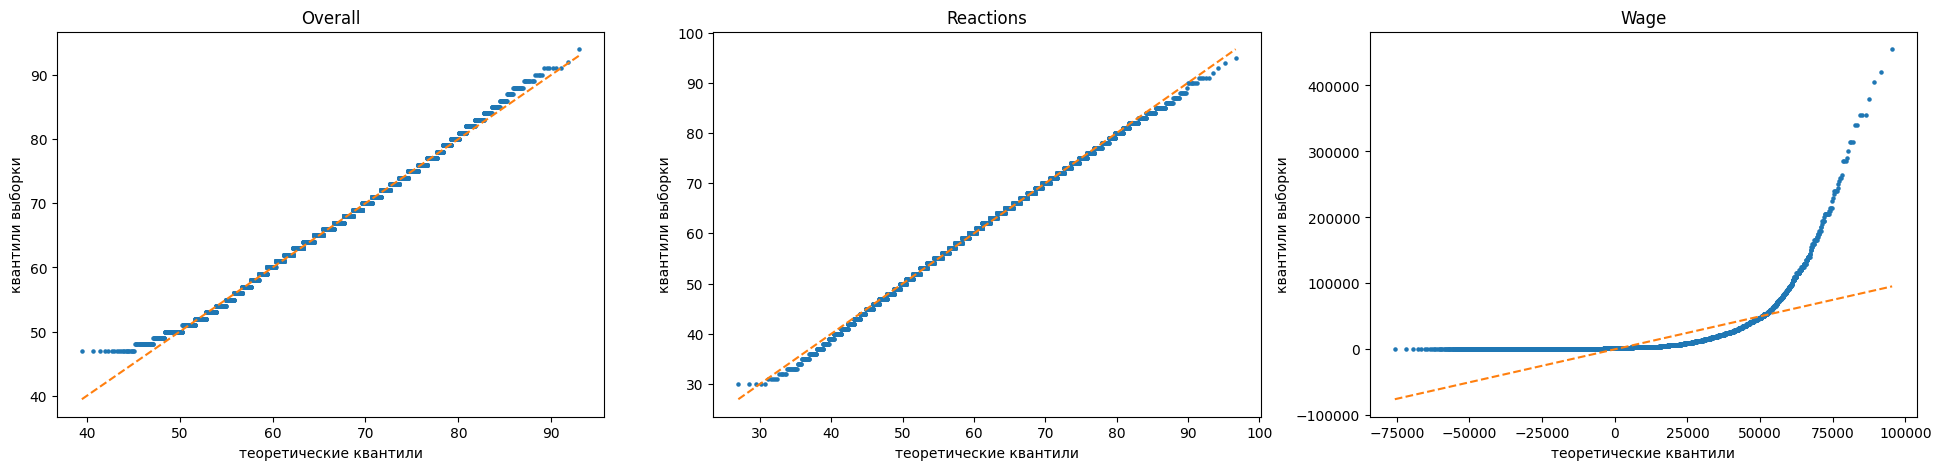

In [50]:
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(6 * 4, 5)

for key, ax in zip(keys, [ax for ax in axes.flatten()]):
    samples = data[key]
    
    loc = samples.mean()
    scale = samples.std()
    
    interval = np.linspace(0, 1, samples.shape[0])[1:-1]
    x = stats.norm.ppf(interval, loc=loc, scale=scale)
    y = np.quantile(samples, interval)
    
    ax.scatter(x, y, s=5)
    ax.plot(x, x, color='C1', linestyle='dashed')
    
    ax.set_title(key)
    ax.set_xlabel('теоретические квантили')
    ax.set_ylabel('квантили выборки')

In [51]:
for key in keys:
    print(key)
    
    samples = data[key]
    
    loc = samples.mean()
    scale = samples.std()

    for i in range(1, 4):
        true_value = stats.norm.cdf(i) - stats.norm.cdf(-i)
        sample_value = ((samples >= loc - i * scale) & (samples <= loc + i * scale)).sum() / samples.shape[0]
        
        print(f'{i} sigma(s)')
        print(f'\ttheoretical:\t{true_value}')
        print(f'\tsample:\t\t{sample_value}')
        
    print()

Overall
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.6959482085054135
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9504408974215872
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9976559883915616

Reactions
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.6865163522714589
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9522826208282175
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9969862707891506

Wage
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.9348141533653309
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9722625293001451
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.98353610894073



Делаем вывод, что оценки игроков и показатель реакции распределены нормально, в отличие от зарплат.

## Зависимость между Overall и Reactions

In [52]:
b1 = np.cov(data['Overall'], data['Reactions'], ddof=1)[0, 1] / np.var(data['Overall'], ddof=1)
b0 = data['Reactions'].mean() - b1 * data['Overall'].mean()

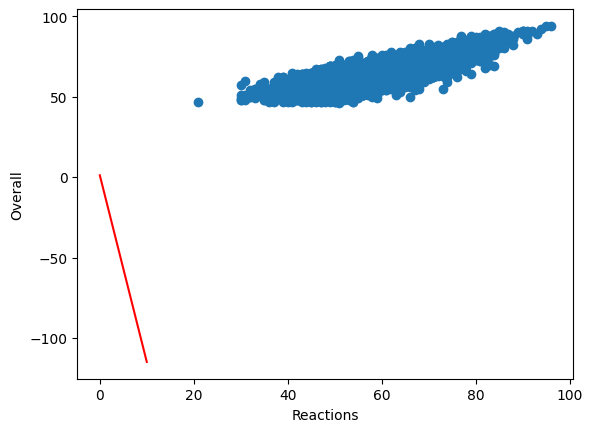

In [53]:
plt.scatter(data['Reactions'], data['Overall'])
plt.xlabel("Reactions")
plt.ylabel("Overall")
x = np.linspace(0, 10, 1000)
y = b0*x + b1
plt.plot(x, y, color = 'r')
plt.show()

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

reg = LinearRegression()
Reactions_train, Reactions_test, Overall_train, Overall_test = train_test_split(data["Reactions"], data["Overall"], test_size=0.33, random_state=42)
Reactions_train = np.array(Reactions_train).reshape(-1, 1)
Reactions_test = np.array(Reactions_test).reshape(-1, 1)

In [76]:
reg = reg.fit(Reactions_train, Overall_train)

Overall_pred = reg.predict(Reactions_test)
mean_absolute_error(Overall_test, Overall_pred)

2.8211729802657564

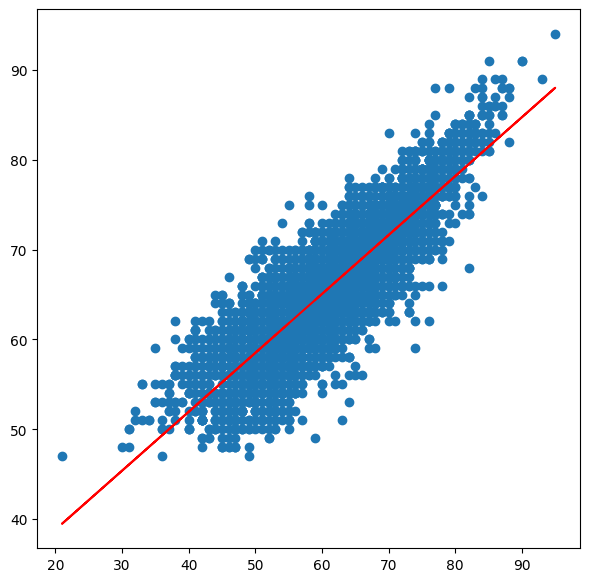

In [91]:
plt.figure(figsize=(7, 7))
plt.scatter(Reactions_test, Overall_test)
plt.plot(Reactions_test, Overall_pred, color='r')
None

<h2>Зависимость между Overall и Wage</h2>

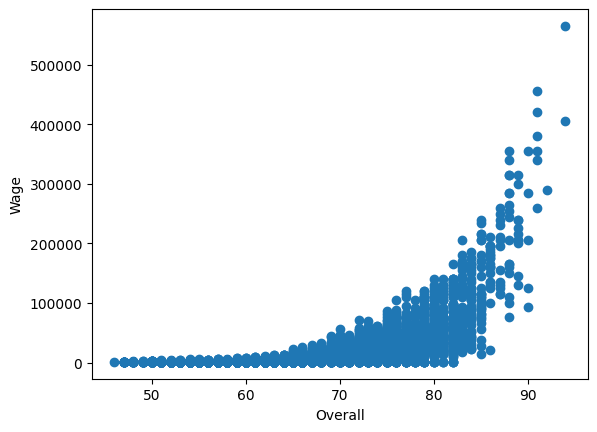

In [87]:
plt.scatter(data['Overall'], data['Wage'])
plt.xlabel("Overall")
plt.ylabel("Wage")
None

Между оценкой и зарплатой игроков явно есть зависимость, но не линейного характера.<br> Скорее всего, неравномерное соотношение зарплат у игроков с самыми низкими/высокими оценками и дает такой эффект на концах распределения

<h2>Аргентина vs остальные</h2>

In [88]:
def var_analise(data, df1, df2, f):
  all1 = df1.shape[0]
  all2 = df2.shape[0]
  res1_mean = df1[f].mean()
  res2_mean = df2[f].mean()
  res_mean = data[f].mean()
  SS_b = all1 * (res1_mean - res_mean) ** 2 + all2 * (res2_mean - res_mean) ** 2
  SS_w = ((df1[f] - res1_mean) ** 2).sum() + ((df2[f]- res2_mean) ** 2).sum()

  k = 2
  n = all1 + all2
  k1 = k - 1
  k2 = n - k
  sigma2_b = SS_b / k1
  sigma2_w = SS_w / k2

  F = sigma2_b / sigma2_w

  alpha = 0.05

  t = stats.f.ppf(1 - alpha, k1, k2)

  return F>t

In [89]:
df1 = data[data['Nationality'] == 'Argentina']
df2 = data[data['Nationality'] != 'Argentina']
print(var_analise(data, df1, df2, 'Overall'))

res1_mean = df1['Overall'].mean()
res2_mean = df2['Overall'].mean()
print(f'Argentinian players: {res1_mean}, other {res2_mean}')

True
Argentinian players: 68.56684491978609, other 66.10852028499087


Действительно, игроки из Аргентины играют в среднем лучше, чем все остальные

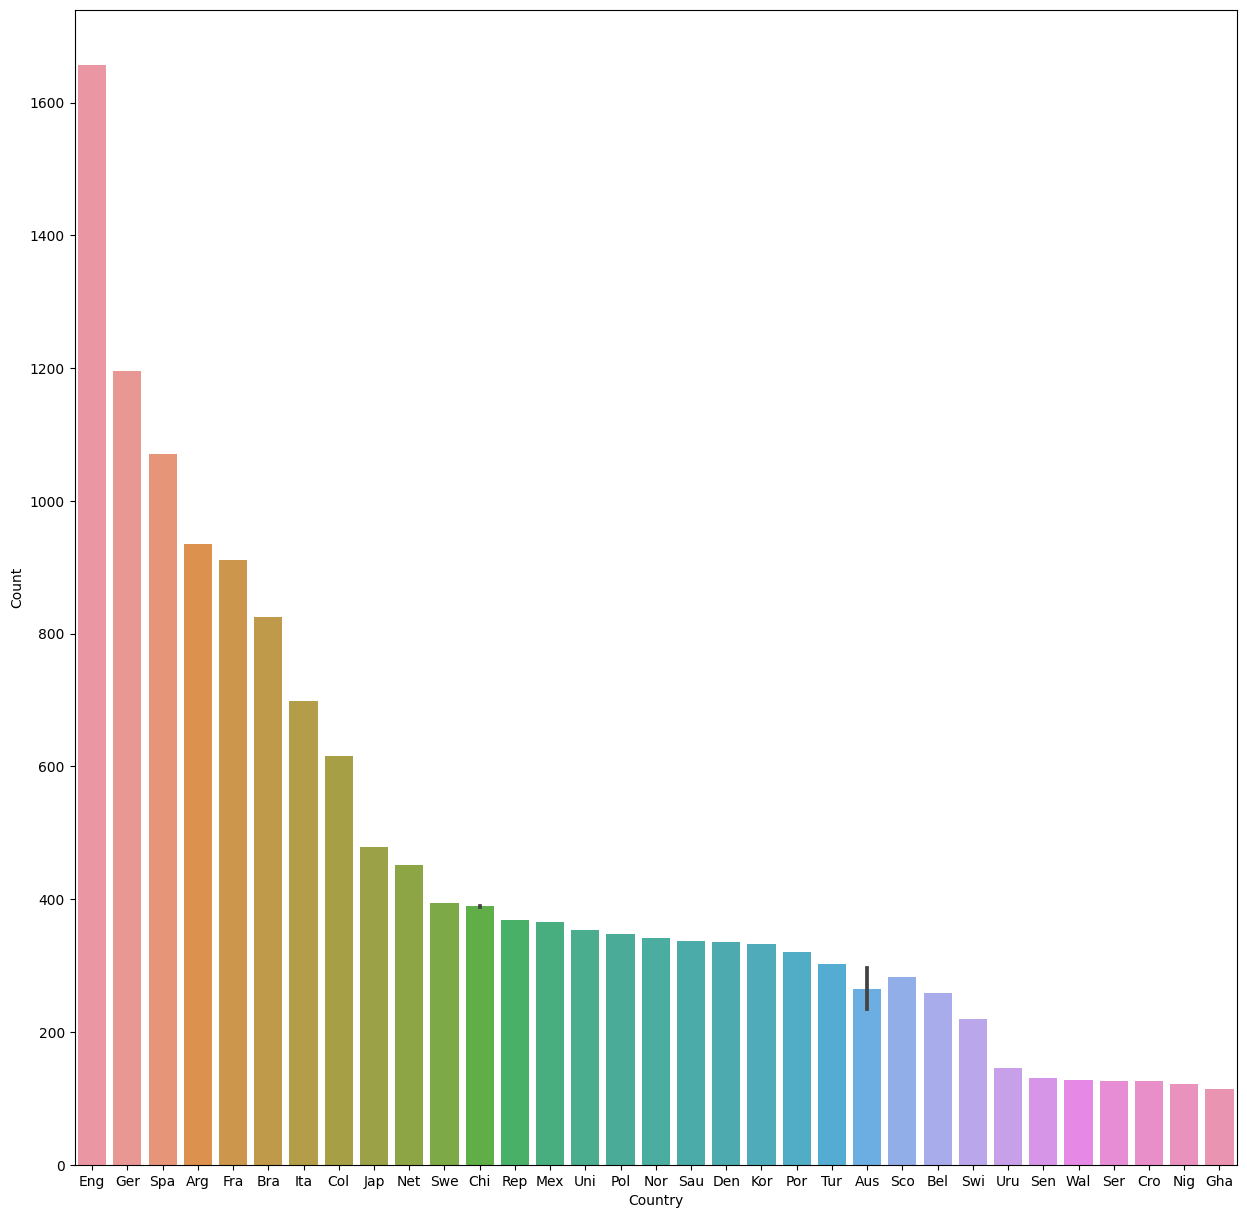

In [90]:
x = data["Nationality"].value_counts().index
y = data["Nationality"].value_counts().values
countries = pd.DataFrame({"Country": x, "Count": y})
countries["Country"] = countries["Country"].apply(lambda c: c[:3])
countries = countries[countries["Count"] > 100]

plt.figure(figsize=(15,15))
sns.barplot(x=countries["Country"], y=countries["Count"])
None